In [1]:
%load_ext autoreload
%autoreload 2

# Get Endgames states

In [33]:
import chess
import numpy as np
import shelve
import os

In [3]:
def check_status(key):
    board = chess.Board()
    key = key + ' - - 0 1'
    board.set_fen(key)
    return board.is_game_over()

def draw_board(board, key):
    key = key + ' - - 0 1'
    board.set_fen(key)
    display(board)
    print(board.is_game_over())
    
def get_next_state(board, move):
    board.push(move)
    fen = ' '.join(board.fen().split(' ')[:2])
    status = int(board.is_checkmate())
    board.pop()
    return fen, -status

In [4]:
def add_state(board, states):
    if board.status() == chess.Status.VALID and not board.is_game_over():
        fen = ' '.join(board.fen().split(' ')[:2])
        states[fen]={}
        for move in board.legal_moves:
            states[fen][str(move)] = {}
            new_fen, status = get_next_state(board, move)
            states[fen][str(move)]['next_state'] = new_fen
            states[fen][str(move)]['status'] = status

# Rook endgame

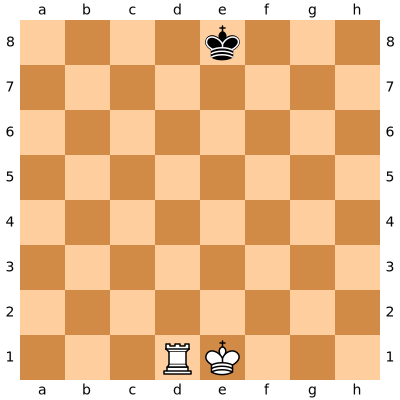

In [20]:
board = chess.Board()
board.clear()
board.set_piece_at(3, chess.Piece(chess.ROOK, True))
board.set_piece_at(4, chess.Piece(chess.KING, True))
board.set_piece_at(60, chess.Piece(chess.KING, False))
board

In [35]:
def get_states_rook(N = 64, folder='./data/rook_states'):
    board = chess.Board()
    if not os.path.exists(folder):
        os.makedirs(folder)
    states = shelve.open(folder+'/states', flag='n', writeback=True)
    for k in range(N):
        print('\rprogress: {}/{}'.format(k+1, N), end ='')
        # Rey negro
        for j in range(N):
            # Rey blanco
            for i in range(N):
                # Torre blanca
                board.clear()
                board.set_piece_at(i, chess.Piece(chess.ROOK, True))
                board.set_piece_at(j, chess.Piece(chess.KING, True))
                board.set_piece_at(k, chess.Piece(chess.KING, False))
                board.turn = True
                add_state(board, states)
                board.turn = False
                add_state(board, states)
        states.sync()
    print()
    states.close()
    return states

In [36]:
# CPU times: user 4min 38s, sys: 6.34 s, total: 4min 45s
# Wall time: 4min 45s
# 398828 different states
# 401 MBytes

%time states = get_states_rook()

progress: 63/64
CPU times: user 4min 41s, sys: 6.51 s, total: 4min 48s
Wall time: 4min 48s


In [37]:
filename='./data/rook_states/states'
states = shelve.open(filename, writeback=True)
len(states)

398828

# Two Bishops endgame

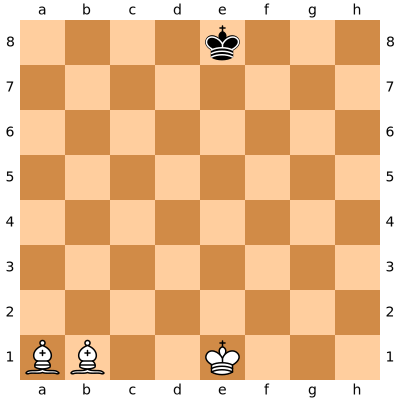

In [38]:
board = chess.Board()
board.clear()
board.set_piece_at(0, chess.Piece(chess.BISHOP, True))
board.set_piece_at(1, chess.Piece(chess.BISHOP, True))
board.set_piece_at(4, chess.Piece(chess.KING, True))
board.set_piece_at(60, chess.Piece(chess.KING, False))
board

In [39]:
def get_states_bishops_final(N=64, folder='./data/two_bishops'):
    if not os.path.exists(folder):
        os.makedirs(folder)
    board = chess.Board()
    states = shelve.open(folder+'/states', flag='n', writeback=True)
    for k in range(N):
        print('\rprogress: {}/{}'.format(k+1, N), end ='')
        # Rey negro
        for j in range(N):
            # Rey blanco
            for i in range(int(N/2)):
                # Alfil blanco
                for m in range(int(N/2)):
                    board.clear()
                    board.set_piece_at(m*2, chess.Piece(chess.BISHOP, True))
                    board.set_piece_at(i*2 + 1, chess.Piece(chess.BISHOP, True))
                    board.set_piece_at(j, chess.Piece(chess.KING, True))
                    board.set_piece_at(k, chess.Piece(chess.KING, False))
                    board.turn = True
                    add_state(board, states)
                    board.turn = False
                    add_state(board, states)
        states.sync()
    states.close()
    print()
    return states

In [40]:
# CPU times: user 38min 13s, sys: 48 s, total: 39min 1s
# Wall time: 39min 12s
# 3.2 GBytes aprox
# 2983300 number of different states
%time states = get_states_bishops_final(N=64)

progress: 64/64
CPU times: user 38min 56s, sys: 54.8 s, total: 39min 51s
Wall time: 39min 56s


In [41]:
filename='./data/two_bishops/states'
states = shelve.open(filename)
len(states)

2983300